# Alyssa Hughes

## Research question/interests

 As I live in a province with a lot of tourism surrounding cities like Kelowna and Vancouver I want to explore different growth rates within tourism.
Where are the majority of BCs tourists coming from: domestically or out-of-province?
What are all the provinces overall tourism spending compared to each other and what are their growth rates from 2014-2017?

In [2]:
import pandas as pd 
df = pd.read_csv("../data/raw/tourism.csv")
df.head()

,REF_DATE,GEO,DGUID,Indicators,Products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2014,Canada,2016A11124,Total domestic supply,Total tourism expenditures,Dollars,81,millions,6,v1001801179,1.1.1,3654954.0,NaN,NaN,NaN,1
1,2014,Canada,2016A11124,Total domestic supply,Total tourism products,Dollars,81,millions,6,v1001801180,1.1.2,212829.4,NaN,NaN,NaN,1
2,2014,Canada,2016A11124,Total domestic supply,Total transportation,Dollars,81,millions,6,v1001801181,1.1.3,98108.0,NaN,NaN,NaN,1
3,2014,Canada,2016A11124,Total domestic supply,Passenger air transport,Dollars,81,millions,6,v1001801182,1.1.4,19961.5,NaN,NaN,NaN,1
4,2014,Canada,2016A11124,Total domestic supply,Passenger rail transport,Dollars,81,millions,6,v1001801183,1.1.5,309.6,NaN,NaN,NaN,1


## Milestone 3 - Data Analysis

### TASK 1 - Exploratory Data Analysis

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#summary stats table for df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
REF_DATE,8960.0,2015.500000,1.500084,2014.0,2014.0,2015.5,2017.0,2017.0
UOM_ID,8960.0,97.100000,48.302696,81.0,81.0,81.0,81.0,242.0
SCALAR_ID,8960.0,6.000000,0.000000,6.0,6.0,6.0,6.0,6.0
VALUE,7521.0,6809.351509,112809.280902,0.0,5.6,37.9,239.6,3910989.7
SYMBOL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TERMINATED,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DECIMALS,8960.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [5]:
#exploring the number of rows and columns - I will need to get rid of many rows for my research question
df.shape

(8960, 16)

In [6]:
#viewing first five rows/ I will also want to change heading names them easier to understand
df.head()

,REF_DATE,GEO,DGUID,Indicators,Products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2014,Canada,2016A11124,Total domestic supply,Total tourism expenditures,Dollars,81,millions,6,v1001801179,1.1.1,3654954.0,NaN,NaN,NaN,1
1,2014,Canada,2016A11124,Total domestic supply,Total tourism products,Dollars,81,millions,6,v1001801180,1.1.2,212829.4,NaN,NaN,NaN,1
2,2014,Canada,2016A11124,Total domestic supply,Total transportation,Dollars,81,millions,6,v1001801181,1.1.3,98108.0,NaN,NaN,NaN,1
3,2014,Canada,2016A11124,Total domestic supply,Passenger air transport,Dollars,81,millions,6,v1001801182,1.1.4,19961.5,NaN,NaN,NaN,1
4,2014,Canada,2016A11124,Total domestic supply,Passenger rail transport,Dollars,81,millions,6,v1001801183,1.1.5,309.6,NaN,NaN,NaN,1


In [7]:
#viewing names of all the columns and realising there are many columns to get rid of in cleaning
print(df.columns)

Index(['REF_DATE', 'GEO', 'DGUID', 'Indicators', 'Products', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')


In [8]:
#This function helps me determine that of my 16 rows, 3= floats(decimal integer) int(whole numbers) = 4, and object rows (usually word variables) = 9
#It also shows me columns 13/14 have all null values and can deleted. I can also try to remove missing some missing values in row 11/12
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8960 entries, 0 to 8959
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REF_DATE       8960 non-null   int64  
 1   GEO            8960 non-null   object 
 2   DGUID          8960 non-null   object 
 3   Indicators     8960 non-null   object 
 4   Products       8960 non-null   object 
 5   UOM            8960 non-null   object 
 6   UOM_ID         8960 non-null   int64  
 7   SCALAR_FACTOR  8960 non-null   object 
 8   SCALAR_ID      8960 non-null   int64  
 9   VECTOR         8960 non-null   object 
 10  COORDINATE     8960 non-null   object 
 11  VALUE          7521 non-null   float64
 12  STATUS         1439 non-null   object 
 13  SYMBOL         0 non-null      float64
 14  TERMINATED     0 non-null      float64
 15  DECIMALS       8960 non-null   int64  
dtypes: float64(3), int64(4), object(9)
memory usage: 1.1+ MB


In [9]:
#Checking if there are any duplicates of Data to be cleaned
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [10]:

#get counts of each variable value - From here I have list of the possible expenditures in the Products Column
#My research question only focuses on Total tourism expenditures and products rows
df.Products.value_counts()

Total tourism expenditures                                     280
Total tourism products                                         280
Urban transit and parking                                      280
Beer, wine, and liquor from stores                             280
Groceries                                                      280
Total other products                                           280
Pre-trip expenses                                              280
Convention fees                                                280
Travel services                                                280
Recreation and entertainment                                   280
Total other tourism products                                   280
Meals and alcoholic beverages from other tourism industries    280
Alcoholic beverages from restaurants                           280
Alcoholic beverages from accommodation                         280
Meals from restaurants                                        

In [11]:
#same as above but I will only be focusing on Domestic vs Interprovincial demand rows
df.Indicators.value_counts()

Total domestic supply               896
Total demand                        896
Domestic demand                     896
Exports                             896
Interprovincial demand (exports)    896
International demand (exports)      896
Imports                             896
Interprovincial imports             896
International imports               896
Tourism product ratio               896
Name: Indicators, dtype: int64

### Visuals made after TASK 2

In [49]:
#Here I am just plotting only total demand so when i set the max bar it will give us back max total demand 
#instead of total tourism supply and demand. I also am excluding Canada from the provinces so we can see the values of the provinces.
df_bar = df2[df2['Indicators'].isin(['Total demand'])]
df_bar1 = df_bar[df_bar['Location'].isin(['British Columbia','Alberta','Manitoba','Saskatchewan','Quebec','Ontario','Newfoundland and Labrador','Yukon','Northwest Territories','Nunavut','Nova Scotia','Newbrunswick','Prince Edward Island'])]
df_bar1.head()

,Year,Location,Indicators,Products,Measure,Scale,Value
352,2014,Newfoundland and Labrador,Total demand,Total tourism expenditures,Dollars,millions,1082.4
353,2014,Newfoundland and Labrador,Total demand,Total tourism products,Dollars,millions,891.1
354,2014,Newfoundland and Labrador,Total demand,Total transportation,Dollars,millions,447.9
355,2014,Newfoundland and Labrador,Total demand,Passenger air transport,Dollars,millions,224.3
356,2014,Newfoundland and Labrador,Total demand,Passenger rail transport,Dollars,millions,0.1


[Text(0.5, 1.0, 'Total Demand by Province'),
 Text(0.5, 0, 'Tourism Demand(Millions)'),
 Text(0, 0.5, '')]

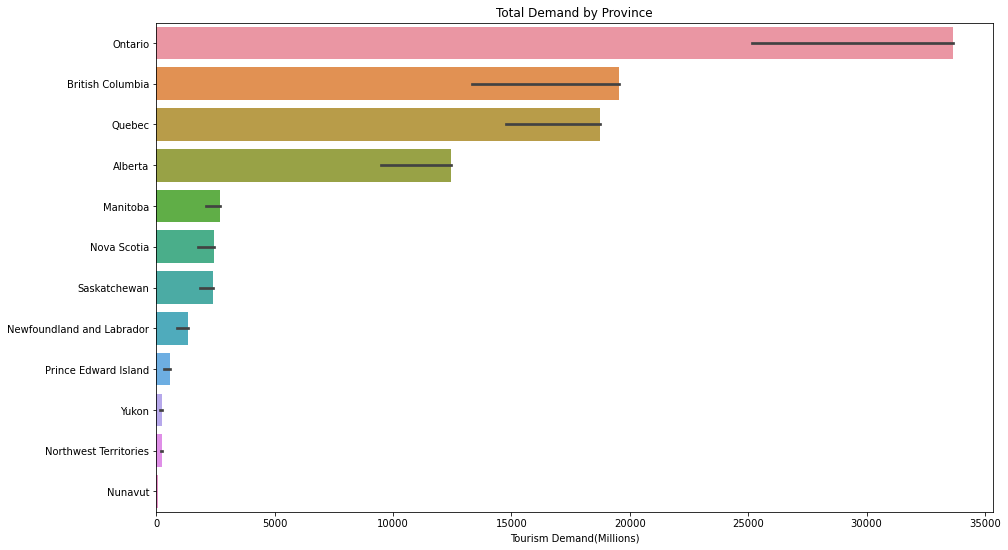

In [79]:
# I am ordering the provinces by greatest demand

#Here we can see the mean overall tourism value for each province, and see that at first glance Ontario has the most followed by Quebec, Alberta then BC
asc = ['Ontario','British Columbia','Quebec','Alberta','Manitoba','Nova Scotia','Saskatchewan','Newfoundland and Labrador','Prince Edward Island','Yukon','Northwest Territories','Nunavut']
plt.figure(figsize = (15,9))
sns.barplot(x='Value',y='Location',data=df_bar1 ,estimator=np.max,order = asc).set(title = 'Total Demand by Province',xlabel='Tourism Demand(Millions)', ylabel='')

[Text(0.5, 1.0, 'Tourism Demand Growth 2014-17 by Province'),
 Text(0.5, 0, 'Tourism Demand(Millions)'),
 Text(0, 0.5, '')]

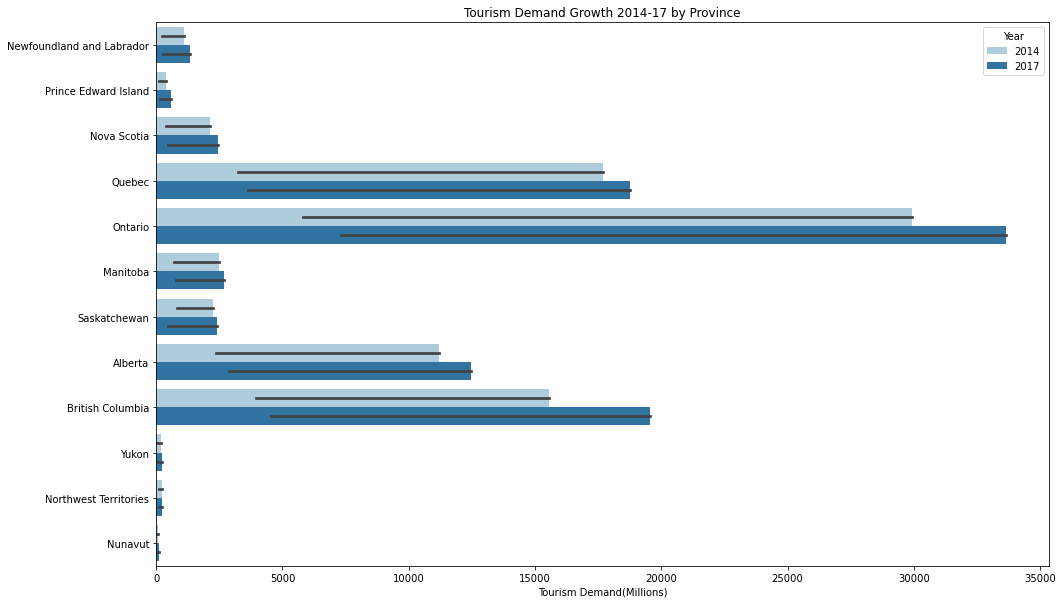

In [90]:
#This shows us our total tourism spending (demand) value (in millions) in all provinces comparing 2014 with 2017 to see the growth rates in comparison
plt.figure(figsize = (16,10))
sns.barplot(x='Value',y='Location',hue='Year',data=df_bar1,estimator=np.max, palette = 'Paired').set(title= 'Tourism Demand Growth 2014-17 by Province',xlabel='Tourism Demand(Millions)',ylabel='')

[Text(0.5, 1.0, 'Where British Columbias Tourists are Visiting from'),
 Text(0, 0.5, 'Total Demand(Millions)')]

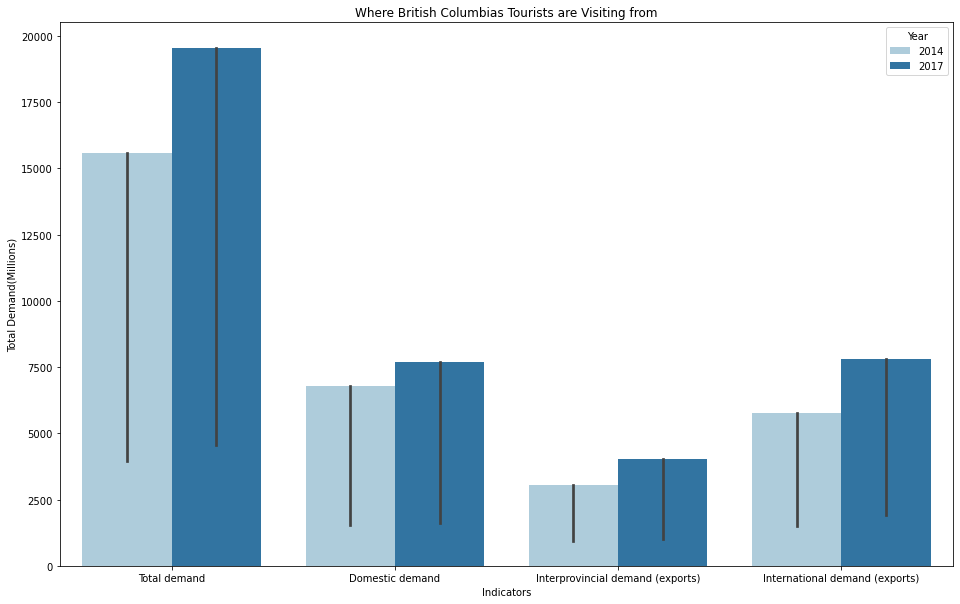

In [93]:

#This is British  Columbias 2014 vs 2017 total tourism spending value (in millions) comparing domestic, interprovincial demand, and international demand 
#to see where most of the average tourist spending comes from
plt.figure(figsize = (16,10))
sns.barplot(x='Indicators',y='Value',hue='Year',data=df4, estimator=np.max, palette='Paired').set(title= 'Where British Columbias Tourists are Visiting from',ylabel='Total Demand(Millions)')

[Text(0.5, 1.0, 'Where Canadas Tourists are Visiting from'),
 Text(0, 0.5, 'Total Demand(Millions)')]

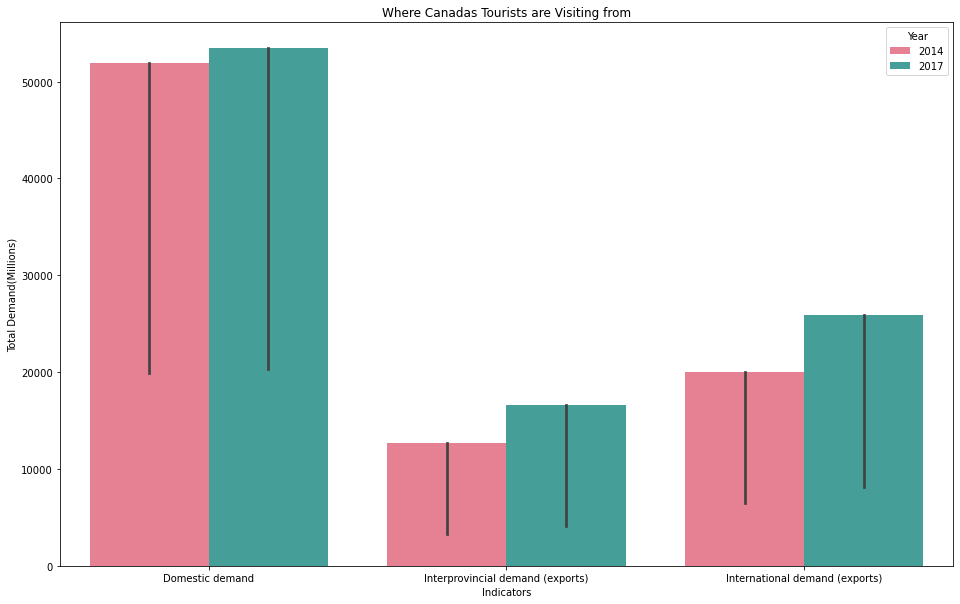

In [124]:
#Next for fun I want to explore Where Ontario's Tourists come from Domestic or International?
df5 = df2[df2['Location'].isin(['Canada'])]
df6 = df2[df2['Indicators'].isin(['Interprovincial demand (exports)','Domestic demand','International demand (exports)'])]
df6.head()
plt.figure(figsize = (16,10))
sns.barplot(x='Indicators',y='Value',hue='Year',data=df6, estimator=np.max, palette='husl').set(title= 'Where Canadas Tourists are Visiting from',ylabel='Total Demand(Millions)')

### TASK 2 - Analysis Pipeline

#### 2.1 Load Data

In [21]:
#This was loaded in the EDA but will reprint here 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.read_csv("../data/raw/tourism.csv")
pd.set_option('display.max_rows', 10)
df1.head()

,REF_DATE,GEO,DGUID,Indicators,Products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2014,Canada,2016A11124,Total domestic supply,Total tourism expenditures,Dollars,81,millions,6,v1001801179,1.1.1,3654954.0,NaN,NaN,NaN,1
1,2014,Canada,2016A11124,Total domestic supply,Total tourism products,Dollars,81,millions,6,v1001801180,1.1.2,212829.4,NaN,NaN,NaN,1
2,2014,Canada,2016A11124,Total domestic supply,Total transportation,Dollars,81,millions,6,v1001801181,1.1.3,98108.0,NaN,NaN,NaN,1
3,2014,Canada,2016A11124,Total domestic supply,Passenger air transport,Dollars,81,millions,6,v1001801182,1.1.4,19961.5,NaN,NaN,NaN,1
4,2014,Canada,2016A11124,Total domestic supply,Passenger rail transport,Dollars,81,millions,6,v1001801183,1.1.5,309.6,NaN,NaN,NaN,1


#### 2.2 Clean Data

In [22]:
#First I will remove columns not being used, and rows columns 13/14 with all null values using the .drop() function with inplace = True will keep the columns deleted whenever I refer to df 
df1.drop(columns=['DGUID','SCALAR_ID','VECTOR','COORDINATE','STATUS','DECIMALS','SYMBOL','TERMINATED','UOM_ID'], axis=1, inplace = True)

In [23]:
df1.head()

,REF_DATE,GEO,Indicators,Products,UOM,SCALAR_FACTOR,VALUE
0,2014,Canada,Total domestic supply,Total tourism expenditures,Dollars,millions,3654954.0
1,2014,Canada,Total domestic supply,Total tourism products,Dollars,millions,212829.4
2,2014,Canada,Total domestic supply,Total transportation,Dollars,millions,98108.0
3,2014,Canada,Total domestic supply,Passenger air transport,Dollars,millions,19961.5
4,2014,Canada,Total domestic supply,Passenger rail transport,Dollars,millions,309.6


In [24]:
#Dealing with missing values. The only NaN values left are about 200 in the values column which is the only value column
#I will then delete all the rows with a NaN value
df2 = df1.dropna()

In [25]:
#Checking if it worked.
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7521 entries, 0 to 8959
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REF_DATE       7521 non-null   int64  
 1   GEO            7521 non-null   object 
 2   Indicators     7521 non-null   object 
 3   Products       7521 non-null   object 
 4   UOM            7521 non-null   object 
 5   SCALAR_FACTOR  7521 non-null   object 
 6   VALUE          7521 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 470.1+ KB


#### 2.3 Process Data

#### 2.4 Wrangle Data 

In [27]:
#not sure if this is processing or wrangling but here I will rename column names so they are eassier to understand
df2 = df2.rename(columns = {
               'REF_DATE': "Year",
               'GEO': "Location",
               'UOM':"Measure",
               'VALUE':"Value",
               'SCALAR_FACTOR': "Scale"
              })     
df2.head()


,Year,Location,Indicators,Products,Measure,Scale,Value
0,2014,Canada,Total domestic supply,Total tourism expenditures,Dollars,millions,3654954.0
1,2014,Canada,Total domestic supply,Total tourism products,Dollars,millions,212829.4
2,2014,Canada,Total domestic supply,Total transportation,Dollars,millions,98108.0
3,2014,Canada,Total domestic supply,Passenger air transport,Dollars,millions,19961.5
4,2014,Canada,Total domestic supply,Passenger rail transport,Dollars,millions,309.6


In [29]:
df3 = df2[df2['Location'].isin(['British Columbia'])]
df4 = df3[df3['Indicators'].isin(['Total demand','Interprovincial demand (exports)','Domestic demand','International demand (exports)'])]
df4.head()

,Year,Location,Indicators,Products,Measure,Scale,Value
3232,2014,British Columbia,Total demand,Total tourism expenditures,Dollars,millions,15570.4
3233,2014,British Columbia,Total demand,Total tourism products,Dollars,millions,13331.3
3234,2014,British Columbia,Total demand,Total transportation,Dollars,millions,6422.3
3235,2014,British Columbia,Total demand,Passenger air transport,Dollars,millions,3957.6
3236,2014,British Columbia,Total demand,Passenger rail transport,Dollars,millions,15.5


### TASK 3 - Method Chain 3.1 

In [31]:

df = (
    pd.read_csv("../data/raw/tourism.csv")
    .drop(columns=['DGUID','UOM_ID','SCALAR_ID','VECTOR', 'COORDINATE', 'STATUS','SYMBOL','TERMINATED', 'DECIMALS'],axis=1)
    .dropna()
    .rename(columns={"REF_DATE":"Year", "GEO":"Location", "SCALAR_FACTOR":"Scalar Factor", "VALUE":"Value"})
)
df.head()


,Year,Location,Indicators,Products,UOM,Scalar Factor,Value
0,2014,Canada,Total domestic supply,Total tourism expenditures,Dollars,millions,3654954.0
1,2014,Canada,Total domestic supply,Total tourism products,Dollars,millions,212829.4
2,2014,Canada,Total domestic supply,Total transportation,Dollars,millions,98108.0
3,2014,Canada,Total domestic supply,Passenger air transport,Dollars,millions,19961.5
4,2014,Canada,Total domestic supply,Passenger rail transport,Dollars,millions,309.6


#### Method Chain 3.2 Wrap Method Chain into Function

In [16]:
def load_and_process(url_or_path_to_csv_file):
    df = (
    pd.read_csv(url_or_path_to_csv_file)
    .drop(columns=['DGUID','UOM_ID','SCALAR_ID','VECTOR', 'COORDINATE', 'STATUS','SYMBOL','TERMINATED', 'DECIMALS'],axis=1)
    .dropna()
    .rename(columns={"REF_DATE":"Year", "GEO":"Location", "SCALAR_FACTOR":"Scalar Factor", "VALUE":"Value"})
    )
    return df
    

In [17]:
load_and_process("../data/raw/tourism.csv")

,Year,Location,Indicators,Products,UOM,Scalar Factor,Value
0,2014,Canada,Total domestic supply,Total tourism expenditures,Dollars,millions,3654954.0
1,2014,Canada,Total domestic supply,Total tourism products,Dollars,millions,212829.4
2,2014,Canada,Total domestic supply,Total transportation,Dollars,millions,98108.0
3,2014,Canada,Total domestic supply,Passenger air transport,Dollars,millions,19961.5
4,2014,Canada,Total domestic supply,Passenger rail transport,Dollars,millions,309.6
...,...,...,...,...,...,...,...
8954,2017,Nunavut,Tourism product ratio,Pre-trip expenses,Percentage,millions,100.0
8955,2017,Nunavut,Tourism product ratio,Total other products,Percentage,millions,0.2
8956,2017,Nunavut,Tourism product ratio,Groceries,Percentage,millions,8.4
8957,2017,Nunavut,Tourism product ratio,"Beer, wine, and liquor from stores",Percentage,millions,9.0


### Method Chain 3.3 Adding function to py.file / importing the project_function back here

In [32]:
import project_functions3
df = project_functions3.load_and_process("../data/raw/tourism.csv")
df

,Year,Location,Indicators,Products,UOM,Scalar Factor,Value
0,2014,Canada,Total domestic supply,Total tourism expenditures,Dollars,millions,3654954.0
1,2014,Canada,Total domestic supply,Total tourism products,Dollars,millions,212829.4
2,2014,Canada,Total domestic supply,Total transportation,Dollars,millions,98108.0
3,2014,Canada,Total domestic supply,Passenger air transport,Dollars,millions,19961.5
4,2014,Canada,Total domestic supply,Passenger rail transport,Dollars,millions,309.6
...,...,...,...,...,...,...,...
8954,2017,Nunavut,Tourism product ratio,Pre-trip expenses,Percentage,millions,100.0
8955,2017,Nunavut,Tourism product ratio,Total other products,Percentage,millions,0.2
8956,2017,Nunavut,Tourism product ratio,Groceries,Percentage,millions,8.4
8957,2017,Nunavut,Tourism product ratio,"Beer, wine, and liquor from stores",Percentage,millions,9.0


In [33]:
df.to_csv('df.csv')

### TASK 4 Conduct Analysis to help Answer Research Question.

### Research Question #1:  What are all the provinces overall tourism spending compared to each other and what are their growth rates from 2014-2017?

#### Below in the Table we can see some observations about the growth or decline in growth of overall tourism spending of all the provinces from 2014-2017
 - We can see the total demand values for Canadas provinces (in Millions).
 - Highlights: Ontarios Value has grown from roughly ~29 billion in 2014 to ~33.5 billions in 2017. About a 15.5% Growth in tourism spending. British Columbias tourism spending has grown from roughly ~15 billion in 2014 to ~20 billion in 2017, about a 25% growth rate. Which is highest growth of the main 4 provinces below. The other provinces are very small in comparison so I am choosing to ignore them in this observation.

[Text(0.5, 1.0, 'Tourism Demand Growth 2014-17 by Province'),
 Text(0.5, 0, 'Tourism Demand(Millions)'),
 Text(0, 0.5, '')]

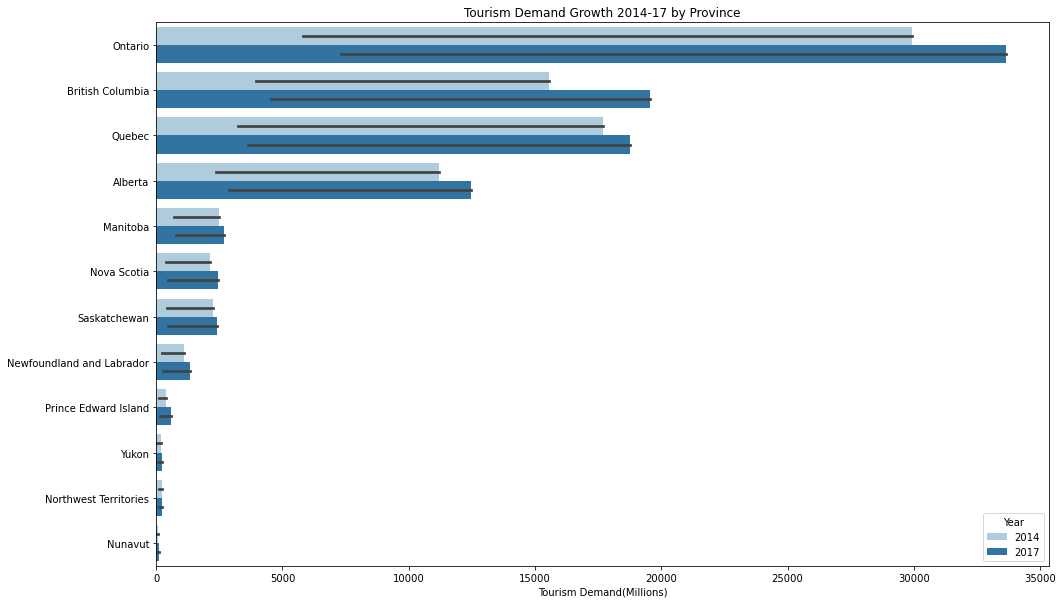

In [128]:
#Note I have used the max function because in the dataset there are rows that calculate the total demand which will be our value we are using
#for each canada and the provinces the total demand in Millions
plt.figure(figsize = (16,10))
sns.barplot(x='Value',y='Location',hue='Year',data=df_bar1,estimator=np.max, palette = 'Paired',order=asc).set(title= 'Tourism Demand Growth 2014-17 by Province',xlabel='Tourism Demand(Millions)',ylabel='')

## Research Question #2: Where are the majority of BCs tourists coming from: domestically or out-of-province?
 - Below These values are also used with a scale factor of millions, so the values here are ranging from 2.7 billion to 20 billion.
 - We can see most of the expenditures from BC come from Domestic residents, Although in 2017 the demand from BC residents and International residents are about the same, roughly 7.6 billion each.
 - We can see that out-of-province resdents demand only equates to about a quarter of total demand.

[Text(0.5, 1.0, 'Where British Columbias Tourists are Visiting from'),
 Text(0, 0.5, 'Total Demand(Millions)')]

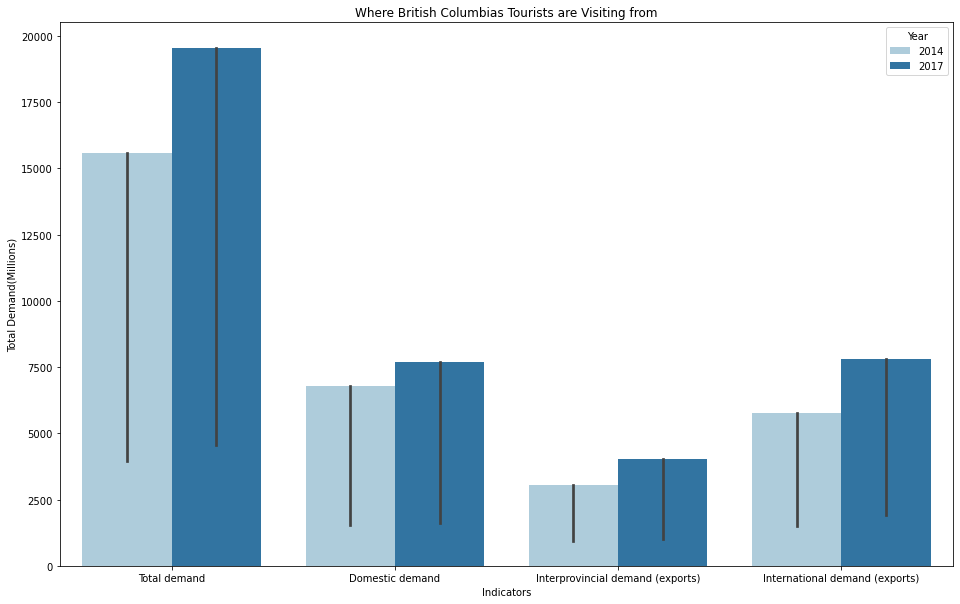

In [129]:
#Same thing as above I have used max values to show the total tourism products in BC for each Indicator category below

plt.figure(figsize = (16,10))
sns.barplot(x='Indicators',y='Value',hue='Year',data=df4, estimator=np.max, palette='Paired').set(title= 'Where British Columbias Tourists are Visiting from',ylabel='Total Demand(Millions)')

# Conclusion: 
- Overall this tourism dataset gave me a lot of new information about different provinces growth rates, and where the tourists are travelling from (ex: Within BC, a neighbouring province, or another Country altogether). 
- I found that British Columbia has the highest growth in tourism demand of 25.5% from 2014-17, while Ontario only had growth of about 15% despite the fact that they have much larger tourism demand in general. 
- I also learned that Overall most of British Columbias tourists come about 35-40% from both within BC and Internationally, with only about 20-25% of tourist demand coming from other provinces. This was a surprise to me because I though tourism demand would be the highest from other Canadian provinces that are visiting.

### Thank you for exploring my Tourism Dataset!